In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [19]:
data = pd.read_csv("Salary Data.csv")

In [21]:
print("Shape:", data.shape)
print("\nInfo:")
print(data.info())

Shape: (375, 6)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None


In [23]:
print("\nMissing Values:\n", data.isnull().sum())
data.head()


Missing Values:
 Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [25]:
# Remove rows with missing Age values
data = data[data['Age'].notnull()]

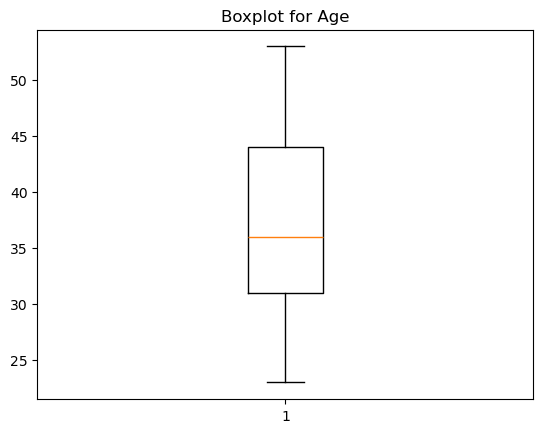

In [27]:
plt.boxplot(data['Age'])
plt.title("Boxplot for Age")
plt.show()

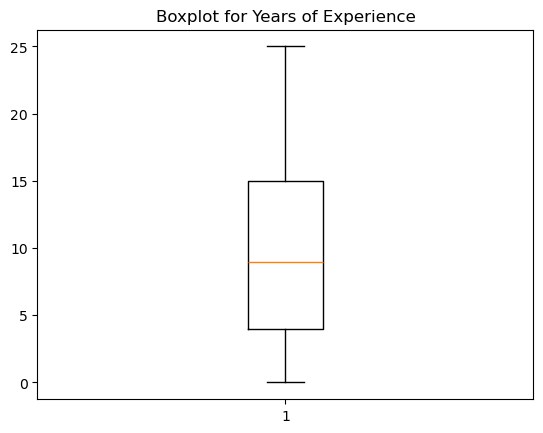

In [28]:
plt.boxplot(data['Years of Experience'])
plt.title("Boxplot for Years of Experience")
plt.show()

In [29]:
x=data.drop(columns=['Salary'])#input
y=data['Salary']#output
x

,Age,Gender,Education Level,Job Title,Years of Experience
0,32.0,Male,Bachelor's,Software Engineer,5.0
1,28.0,Female,Master's,Data Analyst,3.0
2,45.0,Male,PhD,Senior Manager,15.0
3,36.0,Female,Bachelor's,Sales Associate,7.0
4,52.0,Male,Master's,Director,20.0
...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0
371,43.0,Male,Master's,Director of Operations,19.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0


In [31]:
y

0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 373, dtype: float64

In [34]:
x = pd.get_dummies(x, drop_first=True)

In [37]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [40]:
y_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(ytest, y_pred)
mse = mean_squared_error(ytest, y_pred)
rmse = mse ** 0.5
r2 = r2_score(ytest, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 9714.67
MSE: 242247933.33
RMSE: 15564.32
R² Score: 0.90


In [41]:
# Create a sample input (all one-hot encoded columns must match x_train.columns)
sample = pd.DataFrame([{
    'Age': 30,
    
    'Gender': 1,
    'Education Level': 1,
    'Job Title': 1,
    'Years of Experience': 5,
    # Add all other required dummy columns, or use reindex below
}])

# Reindex to match training features
sample = sample.reindex(columns=xtrain.columns, fill_value=0)

# Predict salary
prediction = model.predict(sample)
print("Predicted Salary:", prediction[0])

#ge	Gender	Education Level	Job Title	Years of Experience

Predicted Salary: 48100.0


In [42]:
sample = pd.DataFrame([{
    'Age': 30,
    
    'Gender': 1,
    'Education Level': 3,
    'Job Title': 2,
    'Years of Experience': 12,
    # Add all other required dummy columns, or use reindex below
}])

# Reindex to match training features
sample = sample.reindex(columns=xtrain.columns, fill_value=0)

# Predict salary
prediction = model.predict(sample)
print("Predicted Salary:", prediction[0])

Predicted Salary: 98850.0


In [48]:
import joblib

# Save your trained model
joblib.dump(model, 'salary_model.pkl')

# Save the training columns (important for Streamlit input format)
joblib.dump(xtrain.columns, 'model_columns.pkl')


['model_columns.pkl']

In [50]:
import os
print(os.getcwd())


C:\Users\91990\Employee Salary Prediction
